In [ ]:
# DATA VISULISATION, PREPROCESSING AND SELECTION

In [1]:
#importation des librairies nécessaires
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
from datetime import datetime
import statistics 
import math

In [2]:
! pip install geopandas
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame

     ---------------------------------------- 1.1/1.1 MB 31.8 kB/s eta 0:00:00
     ---------------------------------------- 4.8/4.8 MB 44.6 kB/s eta 0:00:00
     ---------------------------------------- 1.4/1.4 MB 22.7 kB/s eta 0:00:00
     -------------------------------------- 21.7/21.7 MB 352.2 kB/s eta 0:00:00


In [3]:
!pip install geopy
from geopy.geocoders import Nominatim

In [5]:
# ouverture de la bdd
data=pd.read_csv(r"/Users/hamzaab/Desktop/cours/2Ak/statap/eswd_reports_europe_1970_2022.csv", low_memory=False)


#nombre de valeurs non nulles par colonne
x=data.count()
print(x.to_string())

ID                           48389
QC_LEVEL                     48389
INFO_SOURCE                  48387
CONTACT                      48380
EMAIL                            0
ORGANISATION                  8672
ORGANISATION_ID                573
NO_REVISION                  48389
PERSON_REVISION              46471
TIME_EVENT                   48389
TIME_CREATION                48389
TIME_LAST_REVISION           48389
TIME_ACCURACY                46696
COUNTRY                      48389
STATE                        43987
PLACE                        48389
PLACE_LOCAL_LANGUAGE           420
DETAILED_LOCATION             1310
NEAREST_CITY                   530
LATITUDE                     48389
LONGITUDE                    48389
PLACE_ACCURACY               22692
OROGRAPHY                    12406
SURFACE_INITIAL_LOCATION     24440
SURFACE_CROSSED              29007
TYPE_EVENT                   48389
NO_OBJECTS                       0
MAX_HAIL_DIAMETER            31697
MAX_HAILSTONE_WEIGHT

In [6]:
#on élimine les colonnes non nécessaires pour le moment
df=data.drop(['CONTACT','EMAIL', 'ORGANISATION', 'ORGANISATION_ID','CREATOR_ID','REVISOR_ID','PERSON_REVISION','PLACE_LOCAL_LANGUAGE','OROGRAPHY','SURFACE_INITIAL_LOCATION','SURFACE_CROSSED','NO_OBJECTS','EXT_URL','LINK_ORG','LINK_ID','DELETED','F_SCALE','T_SCALE','RATING_BASIS','WIND_SPEED','TEN_MIN_WIND_SPEED','FUNNEL_SIGHTED'  ,'SUCTION_VORTICES' ,'PRECIPITATION_AMOUNT','SNOW_FALL_AMOUNT','PEAK_PRECIP_AMOUNT','PEAK_SNOW_FALL_AMOUNT','PEAK_PRECIP_PERIOD','MAX_6_HOUR_PRECIP','MAX_6_HOUR_SNOW_FALL','MAX_12_HOUR_PRECIP','MAX_12_HOUR_SNOW_FALL','MAX_24_HOUR_PRECIP' ,'MAX_24_HOUR_SNOW_FALL','TYPE_PRECIP','SIZE_ACCOMPANYING_HAIL','POSSIBILITIES','PATH_LENGTH','MEAN_PATH_WIDTH','MAX_PATH_WIDTH','MAX_VERTICAL_DEVELOP','DIRECTION_MOVEMENT','SNOW_HAZARDS','MEAN_HEIGHT_SNOW_CORNICES','MAX_HEIGHT_SNOW_CORNICES','ICE_HAZARDS','THICKNESS_ICE_COVER','THICKNESS_RIME_COVER','AVALANCHE_TYPE','AVALANCHE_FLOW_TYPE','SNOW_MASS_TYPE','AVALANCHE_SIZE','AVALANCHE_TRIGGER','ELEVATION_START','ELEVATION_DIFFERENCE','LIGHTNING_DAMAGE_TO','PEAK_CURRENT','POLARITY','TIME_CREATION','TIME_LAST_REVISION','DETAILED_LOCATION','MAX_HAILSTONE_WEIGHT','CONVECTIVE','PATH_START_LATITUDE','PATH_START_LONGITUDE','PATH_START_DATETIME','PATH_END_LATITUDE','PATH_END_LONGITUDE','PATH_END_DATETIME'],axis=1)

print(df.count())

ID                       48389
QC_LEVEL                 48389
INFO_SOURCE              48387
NO_REVISION              48389
TIME_EVENT               48389
TIME_ACCURACY            46696
COUNTRY                  48389
STATE                    43987
PLACE                    48389
NEAREST_CITY               530
LATITUDE                 48389
LONGITUDE                48389
PLACE_ACCURACY           22692
TYPE_EVENT               48389
MAX_HAIL_DIAMETER        31697
AVERAGE_HAIL_DIAMETER     2310
THICKNESS_HAIL_LAYER      1941
HAILSTONE                48317
TOTAL_DURATION            2192
EXCEPT_ELEC_PHENOM       37290
PROPERTY_DAMAGE           2673
CROP_FOREST_DAMAGE        6466
TOTAL_DAMAGE               299
NO_INJURED                 508
NO_KILLED                  732
EVENT_DESCRIPTION        35956
REFERENCE                17599
IMPACTS                   5553
dtype: int64


           ID
COUNTRY      
VA          1
EG          1
JO          2
TM          2
UZ          3
LY          4
IS          4
LB          5
IE          5
SY          5
TJ          5
MA          6
IL          7
LI          7
KG          9
MT         11
AD         11
TN         19
NO         21
AL         31
MK         36
DZ         40
ME         41
LU         44
DK         80
XK         87
SE         89
LT         90
LV         92
EE        103
CY        120
PT        138
KZ        139
BE        160
NL        185
UK        219
BA        228
SK        327
BY        364
FI        396
MD        472
GE        488
SI        538
AZ        551
HR        552
RS        671
AR        718
CZ        926
BG        986
CH       1030
UA       1099
RO       1187
GR       1201
HU       1255
ES       1737
AT       1941
TR       3410
FR       4008
PL       4975
IT       5203
RU       5653
DE       6651


Text(0, 0.5, 'Nombre de rapports')

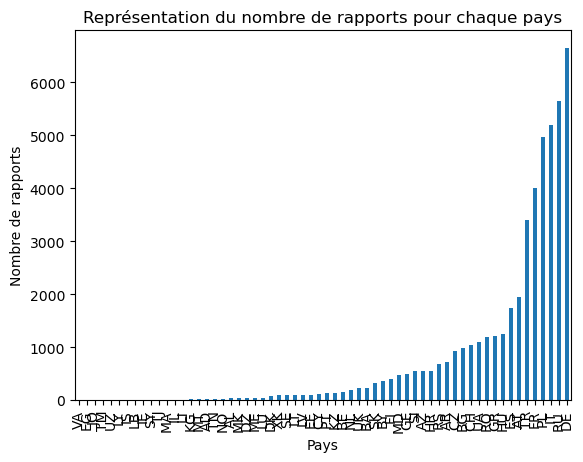

In [7]:
#nombre de rapports par pays
nb_country=df.groupby(['COUNTRY'])[['ID']].count() 
nb_country = nb_country.sort_values('ID')
print(nb_country.to_string())
nb_country['ID'].plot(kind='bar')
plt.title('Représentation du nombre de rapports pour chaque pays')
plt.xlabel('Pays')
plt.ylabel('Nombre de rapports')

In [8]:
#nombre de rapports par état
nb_state=df.groupby(['STATE'])[['ID']].count() #comptage des valeurs non nulles par état
nb_state = nb_state.sort_values('ID')
print(nb_state.to_string())

                                                      ID
STATE                                                   
                                                       1
Neftçala                                               1
Galaţi                                                 1
Sanliurfa Province                                     1
Nederland                                              1
Neamt                                                  1
Saratovskaya oblast                                    1
Fthiotis                                               1
Savinja                                                1
Frýdek-Místek                                          1
Naâma                                                  1
Saône-et-Loire                                         1
Schaan                                                 1
Mécheria                                               1
Frederikssund Kommune                                  1
Karlovarský  kraj              

In [9]:
#nombre de rapports par pays et état
nb_country_state=df.groupby(['COUNTRY','STATE'])[['ID']].count() 
print(nb_country_state.to_string())

                                                              ID
COUNTRY STATE                                                   
AD      Encamp                                                 3
        Escaldes-Engolasters                                   1
        La Massana                                             1
        Ordino                                                 3
        Sant Julià de Lòria                                    2
AL      Dibër                                                  1
        Durrës                                                 1
        Elbasan                                                5
        Fier                                                   2
        Korçë                                                 14
        Kukës                                                  1
        Lezhë                                                  1
        Shkodër                                                3
        Tirana           

        ID
YEAR      
1970     6
1971     8
1972     5
1973    12
1974    33
1975    22
1976    11
1977    37
1978    10
1979   103
1980   138
1981   143
1982   188
1983   179
1984   224
1985   124
1986    67
1987    19
1988    35
1989    17
1990    11
1991    10
1992    43
1993    53
1994    48
1995    33
1996    65
1997    91
1998   124
1999    78
2000   149
2001   198
2002   385
2003   327
2004   472
2005   552
2006   757
2007  1350
2008  1429
2009  1406
2010  1633
2011  1813
2012  2343
2013  2238
2014  2210
2015  2030
2016  2819
2017  2600
2018  2365
2019  3322
2020  3281
2021  5384
2022  7389


<function matplotlib.pyplot.show(close=None, block=None)>

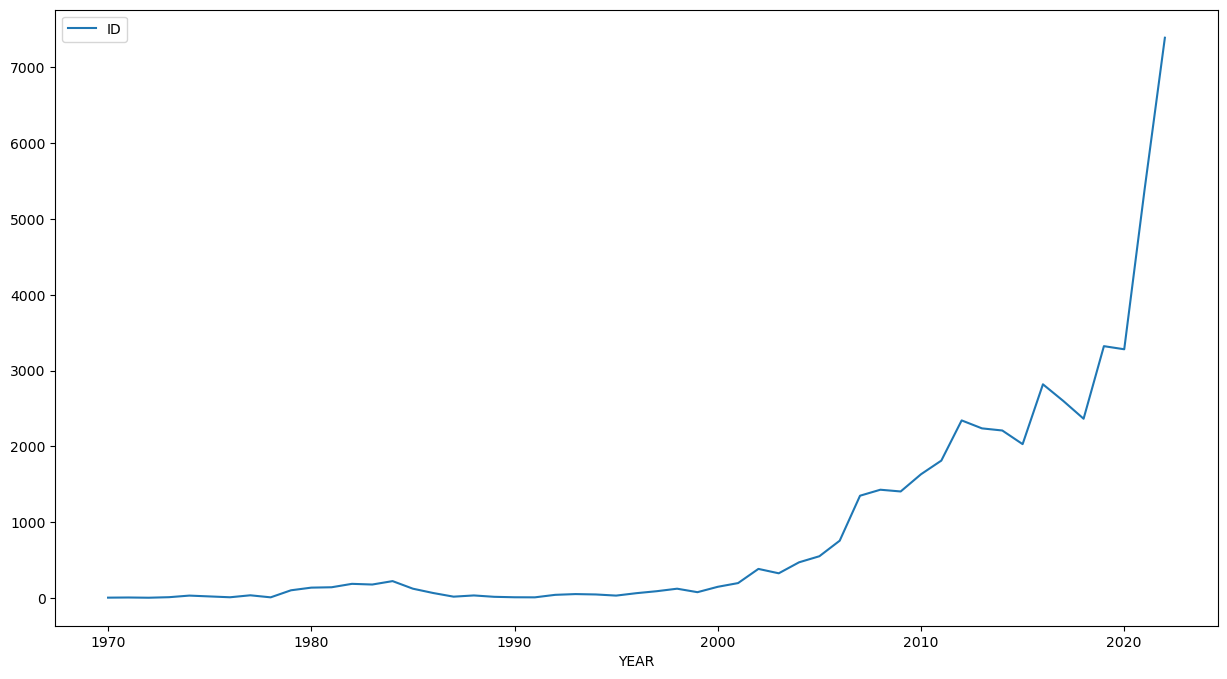

In [10]:
# on cherche à extraire l'année à partir de la date de l'évènement
def get_year(donnee):
    date=donnee['TIME_EVENT']
    dt=datetime.strptime(date,'%Y-%m-%d %H:%M:%S')
    dt=dt.year
    return dt

# créaion d'une colonne contenant l'année de l'évènement
df['YEAR']=df.apply(lambda donnee: get_year(donnee), axis=1)
nb_per_year=df.groupby(['YEAR'])[['ID']].count()
print(nb_per_year.to_string())
nb_per_year.plot(figsize=(15,8))
plt.show

In [11]:
# élimination des rapports antérieurs à 2007
df.drop(df[df.YEAR < 2007].index, inplace=True)

          ID
MONTH       
1        260
2        158
3        421
4       1832
5       9541
6      15073
7       8889
8       5236
9       1372
10       523
11       202
12       105


<function matplotlib.pyplot.show(close=None, block=None)>

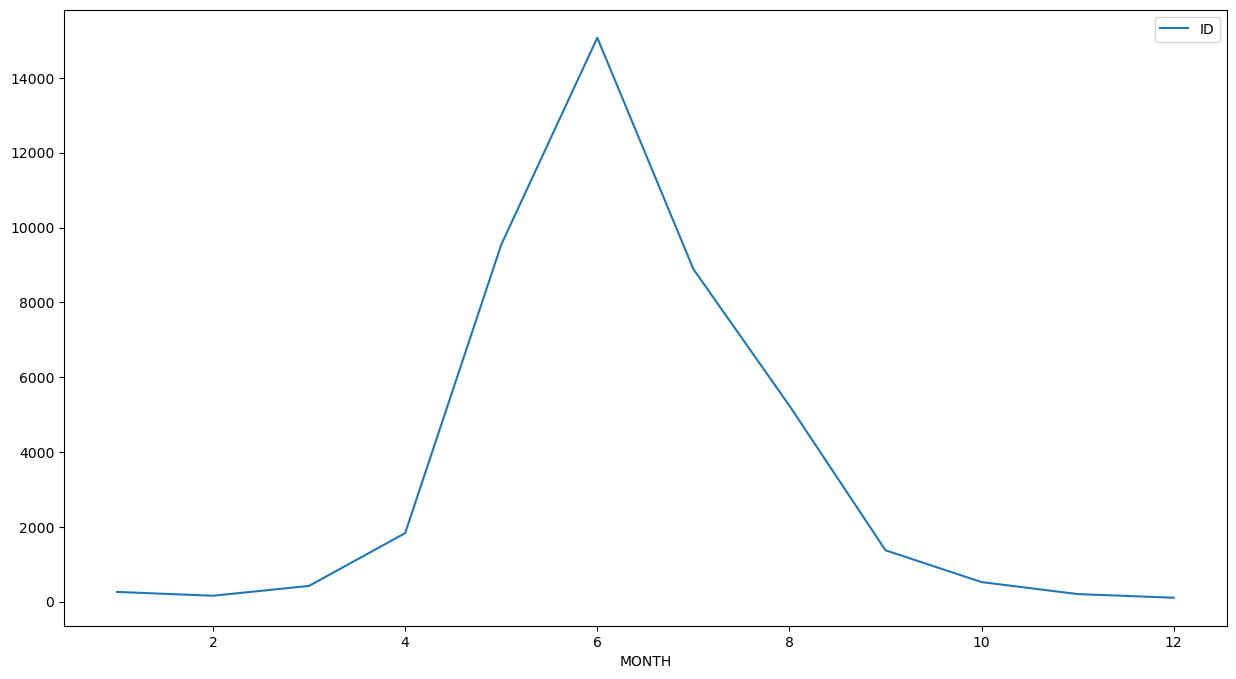

In [12]:
# on cherche à extraire le mois à partir de la date de l'évènement
def get_month(donnee):
    date=donnee['TIME_EVENT']
    dt=datetime.strptime(date,'%Y-%m-%d %H:%M:%S')
    dt=dt.month
    return dt



# créaion d'une colonne contenant le mois de l'évènement
df['MONTH']=df.apply(lambda donnee: get_month(donnee), axis=1)
nb_per_month=df.groupby(['MONTH'])[['ID']].count()
print(nb_per_month.to_string())
nb_per_month.plot(figsize=(15,8))
plt.show

                  ID
TIME_ACCURACY       
HALF_MONTH         3
GT1D              60
1D                93
1M               107
12H              400
6H               971
3H              2783
1H              5503
30M             5902
15M            12866
5M             13554


<AxesSubplot:xlabel='TIME_ACCURACY'>

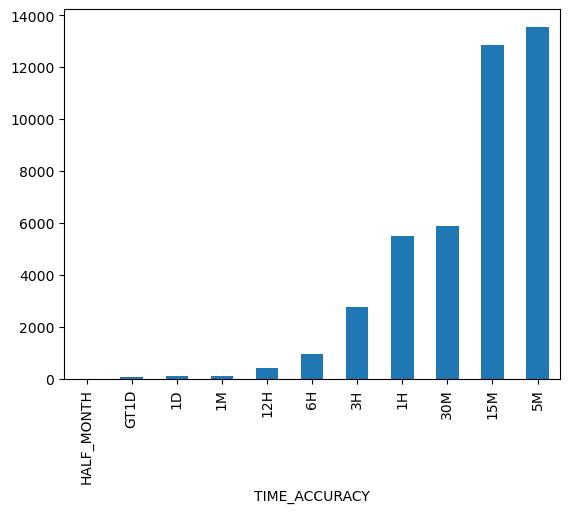

In [13]:
# répartition des rapports selon time accuracy
time_acc_dist=df.groupby(['TIME_ACCURACY'])[['ID']].count()
time_acc_dist=time_acc_dist.sort_values('ID')
print(time_acc_dist.to_string())
time_acc_dist['ID'].plot(kind='bar')

                   ID
PLACE_ACCURACY       
100KM              27
10KM              775
1KM              5837
20KM              500
3KM             12667
50KM               10
5KM              2245
GT100KM             1


<AxesSubplot:xlabel='PLACE_ACCURACY'>

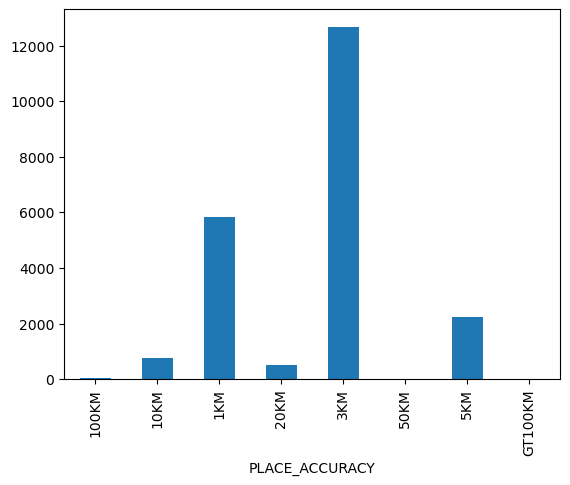

In [14]:
# répartition des rapports selon place accuracy
place_acc_dist=df.groupby(['PLACE_ACCURACY'])[['ID']].count()
place_acc_dist=place_acc_dist.sort_values('PLACE_ACCURACY')
print(place_acc_dist.to_string())
place_acc_dist['ID'].plot(kind='bar')

La moyenne est  nan et l'écart type est nan
                     ID
MAX_HAIL_DIAMETER      
0.00                  6
0.50                  4
0.80                  1
1.00                 94
1.20                  1
1.40                  1
1.50                 59
1.70                  1
1.80                  1
2.00               9693
2.10                  2
2.20                 18
2.25                124
2.30                 17
2.40                 11
2.50               1959
2.60                  6
2.70                  4
2.75                 91
2.80                  5
2.90                  1
3.00               6611
3.20                  3
3.25                106
3.30                  3
3.40                  7
3.50               1285
3.60                  1
3.70                  5
3.75                 20
3.80                  5
3.85                  1
4.00               4114
4.10                  1
4.20                  7
4.25                 36
4.30                  4
4.35                

<function matplotlib.pyplot.show(close=None, block=None)>

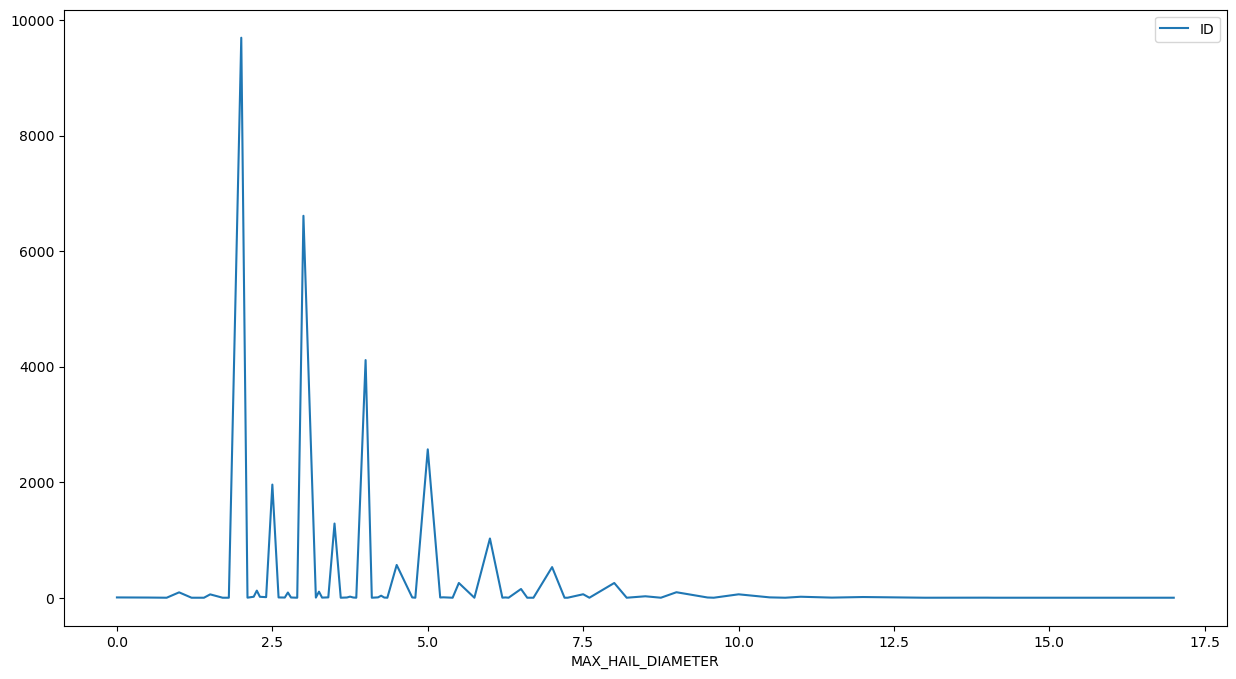

In [15]:
#on cherche à calculer la moyenne et l'écart type du diamètre maximum de la grêle
import statistics 
mean=statistics.mean(df['MAX_HAIL_DIAMETER'])
std=statistics.stdev(df['MAX_HAIL_DIAMETER'])
print("La moyenne est ", mean, "et l'écart type est" ,std)

## répartition du diamtre de la grêle dans les rapports
hail_diam_freq=df.groupby(['MAX_HAIL_DIAMETER'])[['ID']].count()
print(hail_diam_freq.to_string())
hail_diam_freq.plot(figsize=(15,8))
plt.show

In [16]:
#connaître le nombre de valeurs nulles par pays
import math
country=df['COUNTRY'].unique()
null_diam=[]
for i in range(len(country)):
    s=0
    for j in range(len(df)):
        if df['COUNTRY'][j]==country[i]:
            x=df['MAX_HAIL_DIAMETER'][j]
            if math.isnan(x)==True:
                s=s+1
    null_diam.append(s)

df2 = pd.DataFrame({'Country': country,
              'Number of NaN Values': null_diam})
df2=df2.sort_values('Number of NaN Values')
print(df2.to_string())      

   Country  Number of NaN Values
60      EG                     0
3       LB                     0
54      MT                     0
41      LI                     0
59      IE                     1
56      IS                     1
55      JO                     1
52      UZ                     1
48      LY                     1
47      KG                     1
5       MA                     2
53      TM                     2
50      IL                     2
29      EE                     4
37      AD                     4
51      TJ                     4
28      LT                     4
57      NO                     4
58      SY                     4
40      ME                     5
20      DK                     5
30      FI                     6
8       TN                     7
26      MK                    13
7       DZ                    13
25      NL                    14
27      LV                    17
34      XK                    17
45      UK                    21
35      SE

In [17]:
def isNaN(string):
    return string != string

#connaître le nombre de valeurs nulles selon place accuracy
null_placeacc=[]
for i in range(len(country)):
    s=0
    for j in range(len(df)):
        if df['COUNTRY'][j]==country[i]:
            x=df['PLACE_ACCURACY'][j]
            if isNaN(x)==True:
                s=s+1
    null_placeacc.append(s)

df3 = pd.DataFrame({'Country': country,
              'Number of NaN Values': null_placeacc})

df3=df3.sort_values('Number of NaN Values')
print(df3.to_string())

   Country  Number of NaN Values
48      LY                     0
34      XK                     0
3       LB                     0
47      KG                     0
41      LI                     0
51      TJ                     0
52      UZ                     0
53      TM                     0
37      AD                     1
59      IE                     1
60      EG                     1
55      JO                     1
50      IL                     2
5       MA                     2
56      IS                     3
8       TN                     4
58      SY                     4
49      LU                     5
54      MT                     7
57      NO                     9
28      LT                    10
29      EE                    18
26      MK                    18
20      DK                    20
7       DZ                    20
40      ME                    21
38      AL                    22
46      CY                    29
27      LV                    40
45      UK

In [18]:
#connaître le nombre de valeurs nulles selon QC-Level
qc=df['QC_LEVEL'].unique()
null_diam1=[]
null_placeacc1=[]

for i in range(len(qc)):
    s=0
    t=0
    for j in range(len(df)):
        if df['QC_LEVEL'][j]==qc[i]:
            x=df['MAX_HAIL_DIAMETER'][j]
            y=df['PLACE_ACCURACY'][j]
            if math.isnan(x)==True:
                s=s+1
            if isNaN(y)==True:
                t=t+1
    null_diam1.append(s)
    null_placeacc1.append(t)

df4 = pd.DataFrame({'QC-LEVEL': qc,
              'Number of NaN Values Hail': null_diam1,'Number of NaN Values Place':null_placeacc1})
df4=df4.sort_values('Number of NaN Values Hail')
print(df4.to_string())     

  QC-LEVEL  Number of NaN Values Hail  Number of NaN Values Place
2      QC2                        435                         850
1     QC0+                       2103                        3878
0      QC1                      11072                       16822


In [19]:
#connaître le nombre de valeurs nulles par année
year=df['YEAR'].unique()
null_diam2=[]
null_placeacc2=[]

for i in range(len(year)):
    s=0
    t=0
    for j in range(len(df)):
        if df['YEAR'][j]==year[i]:
            x=df['MAX_HAIL_DIAMETER'][j]
            y=df['PLACE_ACCURACY'][j]
            if math.isnan(x)==True:
                s=s+1
            if isNaN(y)==True:
                t=t+1
    null_diam2.append(s)
    null_placeacc2.append(t)

df5 = pd.DataFrame({'YEAR': year,
              'Number of NaN Values Hail': null_diam2,'Number of NaN Values Place':null_placeacc2})
df5=df5.sort_values('Number of NaN Values Hail')
print(df5.to_string()) 

    YEAR  Number of NaN Values Hail  Number of NaN Values Place
4   2018                        659                         627
3   2019                        676                         196
13  2009                        689                        1354
2   2020                        760                         450
7   2015                        769                        1771
11  2011                        773                        1560
5   2017                        809                        2291
14  2008                        849                        1400
1   2021                        859                         619
15  2007                        886                        1239
12  2010                        913                        1283
0   2022                        915                         719
6   2016                        964                        2573
9   2013                       1010                        1678
8   2014                       1011     

In [20]:
#connaître le nombre de valeurs nulles selon time accuracy
timeacc=df['TIME_ACCURACY'].unique()
null_diam3=[]
null_placeacc3=[]

for i in range(len(timeacc)):
    s=0
    t=0
    for j in range(len(df)):
        if df['TIME_ACCURACY'][j]==timeacc[i]:
            x=df['MAX_HAIL_DIAMETER'][j]
            y=df['PLACE_ACCURACY'][j]
            if math.isnan(x)==True:
                s=s+1
            if isNaN(y)==True:
                t=t+1
    null_diam3.append(s)
    null_placeacc3.append(t)

df6 = pd.DataFrame({'TIME_ACCURACY': timeacc,'Number of NaN Values Hail': null_diam3,'Number of NaN Values Place':null_placeacc3})
df6=df6.sort_values('Number of NaN Values Hail')
print(df6.to_string())     

   TIME_ACCURACY  Number of NaN Values Hail  Number of NaN Values Place
8            NaN                          0                           0
9     HALF_MONTH                          2                           2
5             1M                         24                          11
11          GT1D                         54                          55
7             1D                         85                          83
10           12H                        334                         355
6             6H                        664                         880
0             5M                       1553                        4237
4             3H                       1775                        2162
3            30M                       2288                        3035
2             1H                       3210                        4464
1            15M                       3298                        4981


In [21]:
#connaître le nombre de valeurs nulles par mois
month=df['MONTH'].unique()
null_diam4=[]
null_placeacc4=[]

for i in range(len(month)):
    s=0
    t=0
    for j in range(len(df)):
        if df['MONTH'][j]==month[i]:
            x=df['MAX_HAIL_DIAMETER'][j]
            y=df['PLACE_ACCURACY'][j]
            if math.isnan(x)==True:
                s=s+1
            if isNaN(y)==True:
                t=t+1
    null_diam4.append(s)
    null_placeacc4.append(t)

df7 = pd.DataFrame({'MONTH': month,'Number of NaN Values Hail': null_diam4,'Number of NaN Values Place':null_placeacc4})
df7=df7.sort_values('Number of NaN Values Hail')
print(df7.to_string())   

    MONTH  Number of NaN Values Hail  Number of NaN Values Place
10     12                         61                          61
8       2                         86                          78
11     11                         91                         123
9       1                        146                         151
0      10                        176                         214
7       3                        249                         265
1       9                        407                         724
6       4                        927                        1022
2       8                       1336                        2895
3       7                       2257                        4523
5       5                       3587                        5409
4       6                       4287                        6085


<AxesSubplot:>

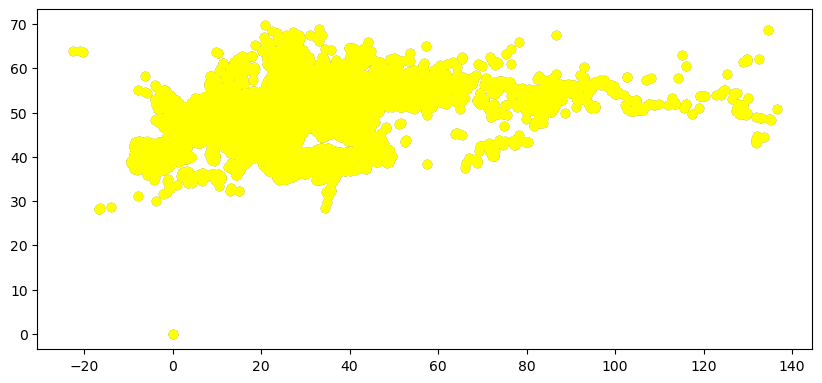

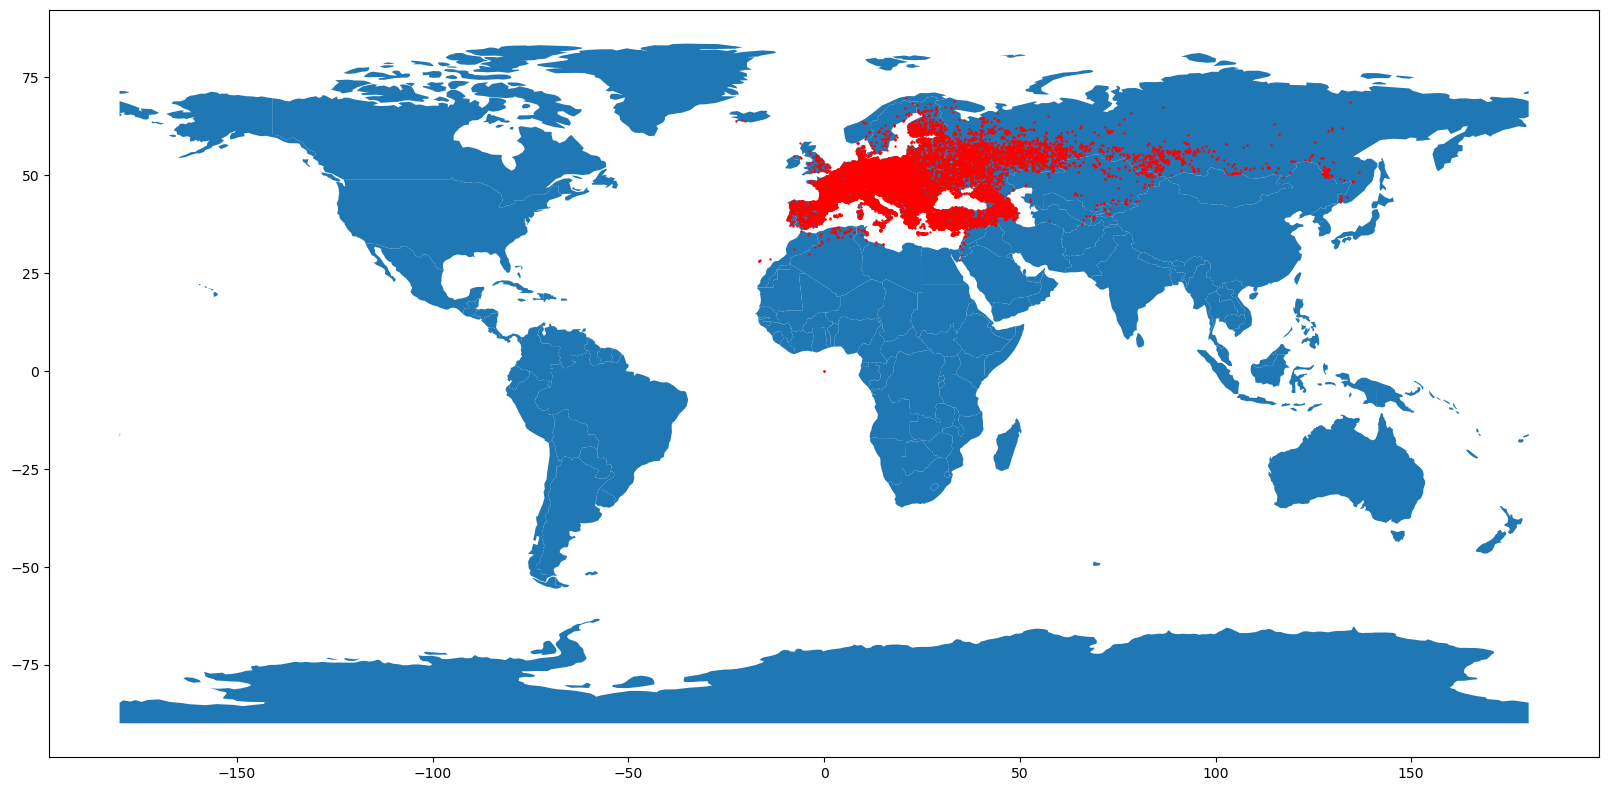

In [22]:
# visulaisation des rapports sur carte
geometry = [Point(xy) for xy in zip(df['LONGITUDE'], df['LATITUDE'])]
gdf = GeoDataFrame(df, geometry=geometry)   


ax = gdf.plot(figsize=(10,5), color="gray")
gdf.plot(figsize=(10,5), ax=ax, color="yellow")

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
gdf.plot(ax=world.plot(figsize=(20, 15)), marker='o', color='red', markersize=0.5)

In [23]:
# valeurs non nulles par colonne
print(df.count().to_string())

ID                       43612
QC_LEVEL                 43612
INFO_SOURCE              43610
NO_REVISION              43612
TIME_EVENT               43612
TIME_ACCURACY            42242
COUNTRY                  43612
STATE                    41265
PLACE                    43612
NEAREST_CITY               293
LATITUDE                 43612
LONGITUDE                43612
PLACE_ACCURACY           22062
TYPE_EVENT               43612
MAX_HAIL_DIAMETER        30002
AVERAGE_HAIL_DIAMETER     1933
THICKNESS_HAIL_LAYER      1769
HAILSTONE                43540
TOTAL_DURATION            1852
EXCEPT_ELEC_PHENOM       35561
PROPERTY_DAMAGE           2061
CROP_FOREST_DAMAGE        5341
TOTAL_DAMAGE               198
NO_INJURED                 188
NO_KILLED                  187
EVENT_DESCRIPTION        31612
REFERENCE                17220
IMPACTS                   5354
YEAR                     43612
MONTH                    43612
geometry                 43612


In [24]:
# convertire TIME-EVENT en format datetime
def convert_dt(donnee):
    date=donnee['TIME_EVENT']
    dt=datetime.strptime(date,'%Y-%m-%d %H:%M:%S')
    return dt
df['TIME']=df.apply(lambda donnee: convert_dt(donnee), axis=1)

In [25]:
#remplacer les données en string dans time accuracy et place accuracy en string (respectivement en minutes et mètres)
df=df.replace('1M','1')
df=df.replace('5M','5')
df=df.replace('15M','15')
df=df.replace('30M','30')
df=df.replace('1H','60')
df=df.replace('3H','180')
df=df.replace('6H','360')
df=df.replace('12H','720')
df=df.replace('GT1D','1440')
df=df.replace('1D','1440')
df=df.replace('HALF_MONTH','21600')
df=df.replace('1KM','1000')
df=df.replace('3KM','3000')
df=df.replace('5KM','5000')
df=df.replace('10KM','10000')
df=df.replace('20KM','20000')
df=df.replace('50KM','50000')
df=df.replace('100KM','100000')
df=df.replace('GT100KM','100000')
df['TIME_ACCURACY'] = df['TIME_ACCURACY'].fillna(0).astype(int)
df['PLACE_ACCURACY'] = df['PLACE_ACCURACY'].fillna(0).astype(int)

In [26]:
# on maintient seulement les données nécessaires pour l'application du modèle 
df=df.loc[:,['LATITUDE','LONGITUDE','TIME_EVENT','COUNTRY','YEAR']]

In [ ]:
#export la dataframe pour pouvoir la réutiliser
df.to_csv(r"/Users/hamzaab/Desktop/cours/2Ak/statap/bdd.csv")
